In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import numpy as np
import scipy.io as sio
import vdmlab as vdm

In [2]:
pos_filename = 'C:/Users/Emily/Desktop/R063-2015-03-20-VT1.nvt'
pxl_to_cm = (8.8346, 7.1628)
position = vdm.load_position(pos_filename, pxl_to_cm)

evt_filename = 'C:/Users/Emily/Desktop/R063-2015-03-20-Events.nev'
labels = dict(led1='TTL Output on AcqSystem1_0 board 0 port 2 value (0x0001).',
              led2='TTL Output on AcqSystem1_0 board 0 port 2 value (0x0002).',
              ledoff='TTL Output on AcqSystem1_0 board 0 port 2 value (0x0000).',
              pb1id='TTL Input on AcqSystem1_0 board 0 port 1 value (0x0040).',
              pb2id='TTL Input on AcqSystem1_0 board 0 port 1 value (0x0020).',
              pboff='TTL Input on AcqSystem1_0 board 0 port 1 value (0x0000).',
              feeder1='TTL Output on AcqSystem1_0 board 0 port 0 value (0x0004).',
              feeder2='TTL Output on AcqSystem1_0 board 0 port 0 value (0x0040).',
              feederoff='TTL Output on AcqSystem1_0 board 0 port 0 value (0x0000).')

events = vdm.load_events(evt_filename, labels)

In [ ]:
plt.plot(position.x, position.y, 'g.', ms=1)
plt.show()

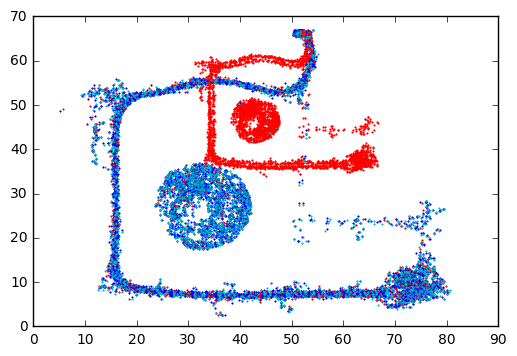

In [4]:
for event in events['led1']:
    idx = vdm.find_nearest_idx(position.time, event)
    plt.plot(position.x[idx], position.y[idx], 'r.', ms=2)
    plt.plot(position.x[idx-1], position.y[idx-1], 'b.', ms=2)
    plt.plot(position.x[idx-2], position.y[idx-2], 'c.', ms=2)
plt.show()

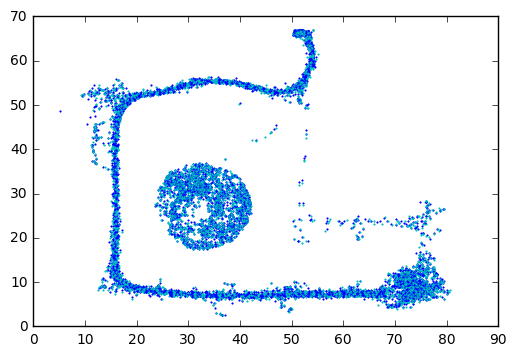

In [6]:
for event in events['led1']:
    idx = vdm.find_nearest_idx(position.time, event)
#     plt.plot(position.x[idx], position.y[idx], 'r.', ms=2)
    plt.plot(position.x[idx-1], position.y[idx-1], 'b.', ms=2)
    plt.plot(position.x[idx-2], position.y[idx-2], 'c.', ms=2)
plt.show()

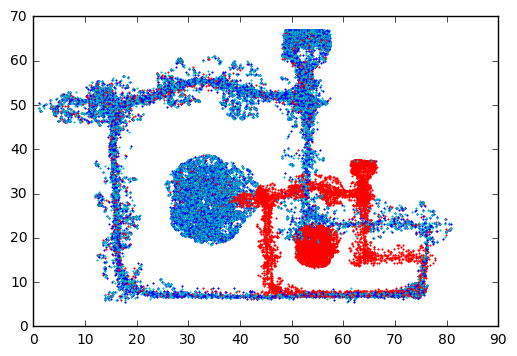

In [5]:
for event in events['led2']:
    idx = vdm.find_nearest_idx(position.time, event)
    plt.plot(position.x[idx], position.y[idx], 'r.', ms=2)
    plt.plot(position.x[idx-1], position.y[idx-1], 'b.', ms=2)
    plt.plot(position.x[idx-2], position.y[idx-2], 'c.', ms=2)
plt.show()

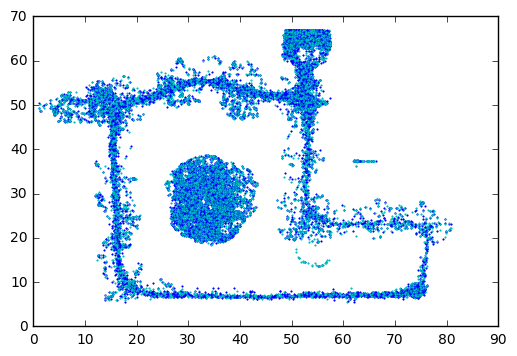

In [7]:
for event in events['led2']:
    idx = vdm.find_nearest_idx(position.time, event)
#     plt.plot(position.x[idx], position.y[idx], 'r.', ms=2)
    plt.plot(position.x[idx-1], position.y[idx-1], 'b.', ms=2)
    plt.plot(position.x[idx-2], position.y[idx-2], 'c.', ms=2)
plt.show()

In [ ]:
def find_distance(target1, target2):
    return np.sqrt((target1[0,:]-target2[0,:])**2 + (target1[1,:]-target2[1,:])**2

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString

import vdmlab as vdm

from load_data import get_pos, get_raw_pos, get_events
from analyze_maze import spikes_by_position
from analyze_plotting import plot_intersects, plot_zone

import sys
# sys.path.append('E:\\code\\python-vdmlab\\projects\\emily_shortcut\\info')
sys.path.append('C:\\Users\\Emily\\Code\\emi_shortcut\\info')
import info.r063d2 as r063d2

In [ ]:
output_path = 'C:\\Users\\Emily\\Code\\emi_shortcut\\cache\\matlab\\spike_pos\\'
# output_path = 'E:\\code\\emi_shortcut\\cache\\matlab\\spike_pos\\'
info = r063d2

In [ ]:
pos = get_pos(info.pos_mat, info.pxl_to_cm)
raw = get_raw_pos(info.raw_pos_mat, info.pxl_to_cm)
events = get_events(info.event_mat)

In [ ]:
len(pos.x)

In [ ]:
len(raw.x)

In [ ]:
# Plot to check
plt.plot(pos.x, pos.y, 'b.', ms=1)
plt.show()

In [ ]:
# Plot to check
plt.plot(raw.x, raw.y, 'b.', ms=1)
plt.show()

In [ ]:
len(events['led1']), len(events['led2'])

In [ ]:
events.keys()

In [ ]:
for event in events['led1']:
    idx = vdm.find_nearest_idx(raw.time, event)
    plt.plot(raw.x[idx], raw.y[idx], 'r.', ms=2)
    plt.plot(raw.x[idx-1], raw.y[idx-1], 'b.', ms=2)
    plt.plot(raw.x[idx-2], raw.y[idx-2], 'c.', ms=2)
plt.show()

In [ ]:
for event in events['led2']:
    idx = vdm.find_nearest_idx(raw.time, event)
    plt.plot(raw.x[idx], raw.y[idx], 'r.', ms=2)
    plt.plot(raw.x[idx-1], raw.y[idx-1], 'b.', ms=2)
    plt.plot(raw.x[idx-2], raw.y[idx-2], 'c.', ms=2)
plt.show()

In [ ]:
def remove_position(position, events, feeder1, feeder2):
    """Removes position that occurs at event times.
    
    Parameters
    ----------
    position: vdmlab.Postition
    event: np.array
    
    Returns
    -------
    filtered_position: vdmlab.Position

    """
    max_idx = len(position.x)
    
    light_on = []
    for event in events['led1']:
        idx = vdm.find_nearest_idx(position.time, event)
        light_on.append(idx)
        if idx < max_idx-3:
            light_on.append(idx+1)
            light_on.append(idx+2)
            light_on.append(idx+3)
        
    for event in events['led2']:
        idx = vdm.find_nearest_idx(position.time, event)
        light_on.append(idx)
        if idx < max_idx-3:
            light_on.append(idx+1)
            light_on.append(idx+2)
            light_on.append(idx+3)
    
    remove_idx = []
    for idx in light_on:
        point = Point(position.x[idx], position.y[idx])
        if feeder1.contains(point) or feeder2.contains(point):
            remove_idx.append(idx)
    
    remove_idx = np.array(remove_idx)
        
    return position_remove(position, remove_idx)
    

In [ ]:
np.diff(raw.x[:10])

In [ ]:
def position_remove(position, remove_idx):
    x = np.delete(position.x, remove_idx)
    y = np.delete(position.y, remove_idx)
    time = np.delete(position.time, remove_idx)
    
    return vdm.Position(np.hstack(np.array([x, y])[..., np.newaxis]), time)

In [ ]:
feeder_radius = 40
feeder1_pt = Point(info.path_pts['feeder1'])
feeder1 = feeder1_pt.buffer(feeder_radius)

feeder2_pt = Point(info.path_pts['feeder2'])
feeder2 = feeder2_pt.buffer(feeder_radius)

In [ ]:
fixed = remove_position(raw, events, feeder1, feeder2)

In [ ]:
len(pos.time), len(fixed.time)

In [ ]:
plt.plot(raw.x, raw.y, 'b.', ms=1)
# plt.plot(feeder1.exterior.xy[0], feeder1.exterior.xy[1], 'r')
# plt.plot(feeder2.exterior.xy[0], feeder2.exterior.xy[1], 'g')
plt.show()

In [ ]:
raw

In [ ]:
# Literally from position_shortcut.m

def light_on(events):
    starts = events['led1']
    stops = events['led1'] + 3
    
    led1_epochs = vdm.Epoch(starts, stops-starts)
    
    starts = events['led2']
    stops = events['led2'] + 3
    
    led2_epochs = vdm.Epoch(starts, stops-starts)
    
    return led1_epochs.join(led2_epochs)

In [ ]:
light_epochs = light_on(events)

In [ ]:
light_epochs.n_epochs

In [ ]:
expand_by = 5
feeder1_center = Point(info.path_pts['feeder1'][0], info.path_pts['feeder1'][1])
feeder1 = feeder1_center.buffer(expand_by*2)
feeder2_center = Point(info.path_pts['feeder2'][0], info.path_pts['feeder2'][1])
feeder2 = feeder2_center.buffer(expand_by*2)

In [ ]:
plt.plot(raw.x, raw.y, 'g.', ms=1)
plot_zone(feeder1)
plot_zone(feeder2)
plt.show()

In [ ]:
def correct_position(position, events, feeder1, feeder2):
    """Removes positions above a certain speed threshold

    Parameters
    ----------
    position : vdmlab.Position
    events: dict
        With led1, feederoff, type, feeder1, pb2, ledoff, led2, pboff, label, pb1, feeder2 as keys.

    Returns
    -------
    filtered_position : vdmlab.Position

    """
    remove_idx = []
    for event in events['feederoff']:
        idx = vdm.find_nearest_idx(raw.time, event)
        for i in range(5):
            point = Point([pos.x[idx-i], pos.y[idx-i]])
            if feeder1.contains(point) or feeder2.contains(point):
                remove_idx.append(i)
    
    return position[~np.hstack(remove_idx)]

In [ ]:
test = correct_position(raw, events, feeder1, feeder2)

In [ ]:
plt.plot(test.x, test.y, 'g.', ms=1)
plt.show()